Cargar el video desde el Drive

In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

# Cargar el video desde el Drive
#drive.mount('/content/drive', force_remount=True)

Información del Video:
  FPS: 3.0
  Resolución: 1500 x 440
  Total Tramas: 11


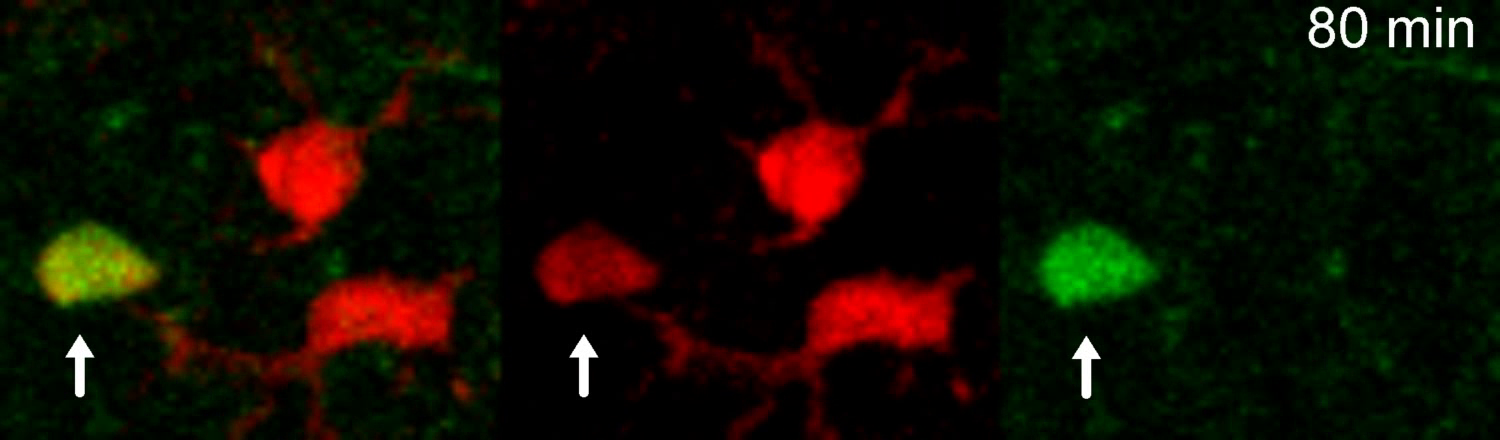

In [ ]:
video = "https://github.com/FerneyOAmaya/Competencias-Digitales/raw/refs/heads/master/NIHMS711755-supplement-Supplementary_Video_3.avi"

cap = cv2.VideoCapture(video)

if not cap.isOpened():
    print("Error: No puede abir el video")

#Información del video
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("Información del Video:")
print("  FPS:", fps)
print("  Resolución:", width, "x", height)
print("  Total Tramas:", total_frames)

#Seleccionar frame
frame_number = 4
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

#Leer frame
ret, frame = cap.read()

if ret:
  #Visualizar frame
  cv2_imshow(frame)
  cv2.destroyAllWindows()
else:
  print("Error: No puede leer el Frame")

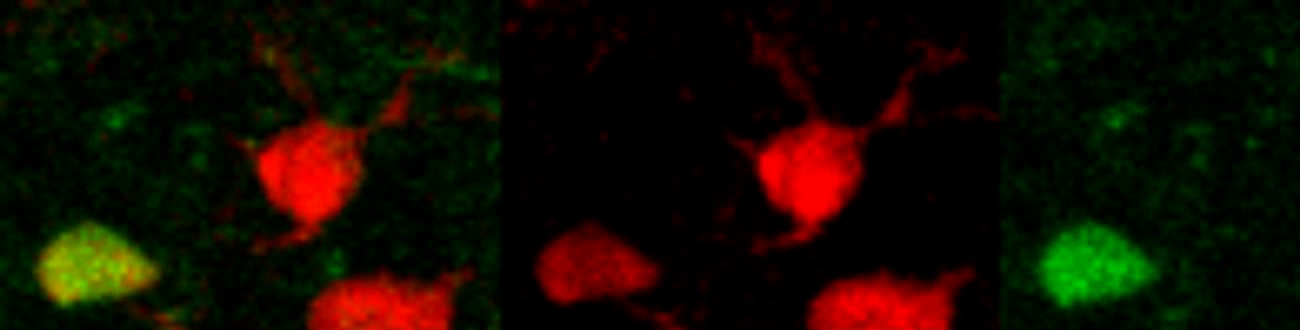

In [ ]:
if ret:
  # Región de corte (x, y, width, height)
  x = 0  #Inicio x
  y = 0   #Inicio y
  w = 1300  #Ancho corte
  h = 330  #Alto corte

  #Recorte de la imagen
  cropped_frame = frame[y:y+h, x:x+w]

  #Visualizar
  cv2_imshow(cropped_frame)
  cv2.destroyAllWindows()

  #Para salvar la imagen recortada:
  #cv2.imwrite("cropped_image.jpg", cropped_frame)

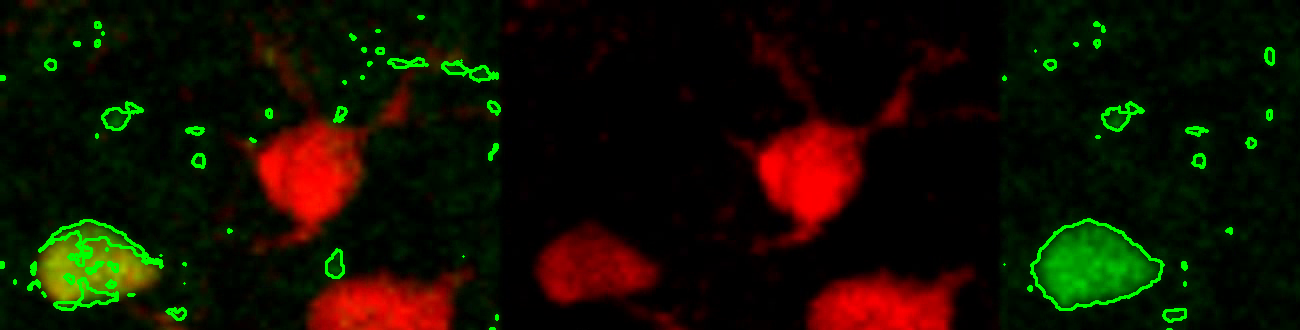

In [ ]:
if ret:
  #Convertir la imagen recortada a HSV
  hsv = cv2.cvtColor(cropped_frame, cv2.COLOR_BGR2HSV)

  #Definir el rango de color verde en HSV
  lower_green = np.array([40, 40, 40])
  upper_green = np.array([80, 255, 255])

  #Extrea la imagen con los tonos de color en el rango
  mask = cv2.inRange(hsv, lower_green, upper_green)

  #Encuentra los contornos de la imagen
  contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  #Dibuja los contornos en la imagen
  cv2.drawContours(cropped_frame, contours, -1, (0, 255, 0), 2)  # Green contours

  #Muestra la imagen con los contornos
  cv2_imshow(cropped_frame)
  cv2.destroyAllWindows()

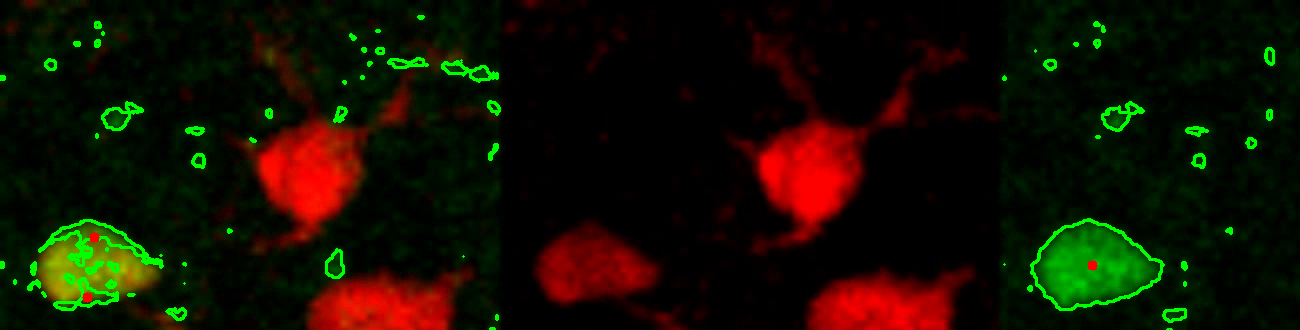

Centroid 1: x=1092, y=265
Centroid 2: x=94, y=237
Centroid 3: x=87, y=297


In [ ]:
#Ordena los contornos por área en orden descendente
contours = sorted(contours, key=cv2.contourArea, reverse=True)

#Encuentra los centroides de los 3 mayores contornos
centroids = []
for i in range(min(3, len(contours))):  #Procesa solo los 3 mayores contornos
    M = cv2.moments(contours[i])
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        centroids.append((cX, cY))
        #Dibuja un círculo rojo en el centroide
        cv2.circle(cropped_frame, (cX, cY), 5, (0, 0, 255), -1)


#Muestra la imagen
cv2_imshow(cropped_frame)
cv2.destroyAllWindows()

#Imprime las coordenadas de los centroides
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: x={centroid[0]}, y={centroid[1]}")


In [ ]:
#Libera los recursos
cap.release()